In [1]:
# Eric Staveley    MWSa   Surf's Up HW Assignment
# climate_study.ipny

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, distinct, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Display the Measurement row's columns and data in dictionary format  
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2842197cc0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [12]:
# Display the Station row's columns and data in dictionary format  
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x28421db7b8>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [13]:
#earliest date in the data
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [14]:
#latest date in the data
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [15]:
engine.execute('SELECT * FROM measurement LIMIT 5').keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [16]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [17]:
engine.execute('SELECT * FROM station LIMIT 5').keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [18]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [19]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [20]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [21]:
#see it df style
df_meas = pd.read_sql_query('SELECT * FROM measurement LIMIT 10', session.bind.engine)
df_meas.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [22]:
#see it df style
df_station= pd.read_sql_query('SELECT * FROM station LIMIT 10', session.bind.engine)
df_station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Select only the date and prcp values
sel = [(Measurement.date).label("Date"), 
       (Measurement.prcp).label("Precipitation"), 
      ]

In [24]:
# Calculate the date 1 year ago from the last data point in the database

last_data_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_data_date_dt = pd.to_datetime(last_data_date)
print(f"Date of last data point:  {last_data_date_dt}")

#date one year before that
date_year_before = last_data_date_dt - dt.timedelta(days=365)
print(f"One year b4 last data point: {date_year_before}")


Date of last data point:  DatetimeIndex(['2017-08-23'], dtype='datetime64[ns]', freq=None)
One year b4 last data point: DatetimeIndex(['2016-08-23'], dtype='datetime64[ns]', freq=None)


In [25]:
#getting last year object to string
year_back = date_year_before.strftime("%Y-%m-%d")
year_back_str = year_back[0]

#getting max date to str (for plotting)
last_data_date = last_data_date_dt.strftime("%Y-%m-%d")
last_data_date_str = last_data_date[0]

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp = session.query(*sel).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= year_back_str).\
    order_by(Measurement.date).statement

prcp_df = pd.read_sql_query(prcp,session.bind.engine)
prcp_df.set_index('Date').head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [26]:
# Sort the dataframe by date  (ascending)
prcp_df_sorted = prcp_df.sort_index()
prcp_df_sorted = prcp_df_sorted.dropna()
#prcp_df_sorted.head(20)
#len(prcp_df_sorted)
prcp_df_sorted.head(10)

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
7,2016-08-24,0.08
8,2016-08-24,2.15
9,2016-08-24,2.28
11,2016-08-24,1.22


<Figure size 2880x1440 with 0 Axes>

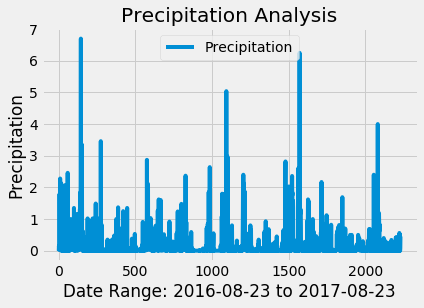

In [27]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(40,20))
plt.style.use('fivethirtyeight')
prcp_df_sorted.plot()
plt.grid(True)
xlabelstr = "Date Range: " + year_back_str + " to " + last_data_date_str
plt.xlabel(xlabelstr)
plt.ylabel("Precipitation")
plt.title("Precipitation Analysis")
plt.legend()
#plt.tight_layout()
plt.show()

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df_sorted.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [29]:
# Design a query to show how many stations are available in this dataset?
locations = session.query(Measurement).group_by(Measurement.station).count()
print(f"There are {locations} stations.")

#-or-
#station_count = session.query(func.count(distinct(Measurement.station)))
#station_count.all()


There are 9 stations.


In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

busy_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

print("Station,  NumMeasurements")
busy_stations


Station,  NumMeasurements


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

busiest_station = busy_stations[0][0]    
print(f"Busiest station: {busiest_station}")

#max
max_temperature = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == busiest_station)
print("Station,   TempMin,   TempMax,    TempAvg")
max_temperature.all()
                     


Busiest station: USC00519281
Station,   TempMin,   TempMax,    TempAvg


[('USC00519281', 54.0, 85.0, 71.66378066378067)]

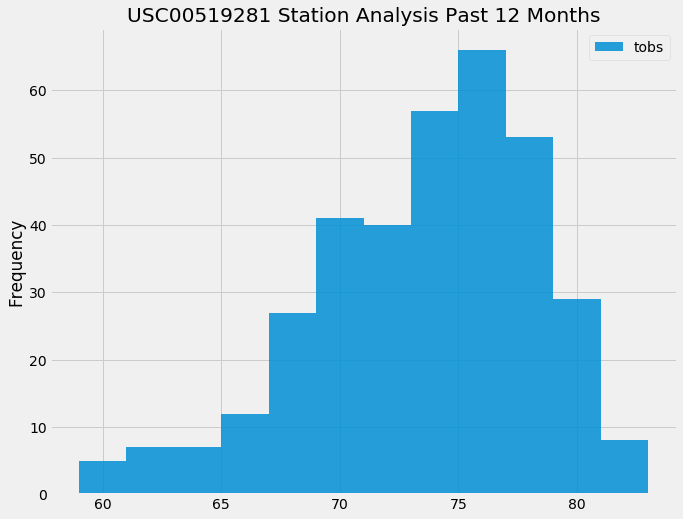

In [32]:
most_temp_observed_station = session.query(Measurement.station, func.count(Measurement.tobs)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).\
        first()

most_temp_observed_station

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observed_temp_data = session.query(Measurement.tobs).\
                filter(Measurement.date >= year_back_str).\
                filter(Measurement.station == most_temp_observed_station[0]).all()

df_observed_temp_data = pd.DataFrame(observed_temp_data, columns=['tobs'])

months = 12    #bins

titlestr = busiest_station + " Station Analysis Past 12 Months"
df_observed_temp_data.plot.hist(bins=months, title=titlestr, figsize=(10, 8), alpha=0.85)
plt.show()

In [33]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [34]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_start = '2016-02-01'
trip_end = '2016-02-15'

my_vac = calc_temps(trip_start, trip_end)

df_my_vac = pd.DataFrame(my_vac, columns=['tmin', 'tavg', 'tmax'])
df_my_vac

,tmin,tavg,tmax
0,56.0,69.333333,79.0


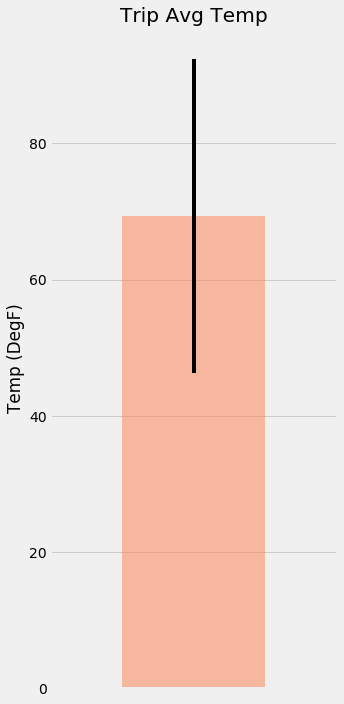

In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

diff = df_my_vac['tmax'] - df_my_vac['tmin']

ax = df_my_vac.plot.bar(title='Trip Avg Temp', y='tavg', yerr=diff, color='coral', alpha=0.5, figsize = (5, 10))
plt.ylabel('Temp (DegF)')
plt.xticks([]) # turn off xticks
plt.tight_layout()
plt.gca().legend_.remove()
plt.show()

In [36]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

#defined above...but reminder:
#trip_start = '2017-02-01'
#trip_end = '2017-02-15'

trip_start_dt = pd.to_datetime(trip_start)
trip_end_dt = pd.to_datetime(trip_end)

#calc a year back
trip_start_yr_prior_dt = trip_start_dt - dt.timedelta(days=365)
trip_end_yr_prior_dt = trip_end_dt - dt.timedelta(days=365)

#put back to strings
trip_start_yr_prior_str = trip_start_yr_prior_dt.strftime("%Y-%m-%d")
trip_end_yr_prior_str = trip_end_yr_prior_dt.strftime("%Y-%m-%d")




In [37]:
sel_trip = [(Station.station).label("Station"), 
       (Station.name).label("Name"), 
       (Station.latitude).label("Latitude"), 
       (Station.longitude).label("Longitude"),
       (Station.elevation).label("Elevation"),
       (func.sum(Measurement.prcp).label("Total Rainfall"))]


my_trip = session.query(*sel_trip).\
                join(Measurement, Station.station == Measurement.station).\
                filter(Measurement.date >= trip_start_yr_prior_str).\
                filter(Measurement.date <= trip_end_yr_prior_str).\
                group_by(Station.station).\
                order_by(func.sum(Measurement.prcp).desc()).\
                all()

my_trip

[('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  3.1799999999999997),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.8),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  1.43),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  1.1600000000000001),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  0.8400000000000001),
 ('USC00517948',
  'PEARL CITY, HI US',
  21.3934,
  -157.9751,
  11.9,
  0.29000000000000004),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  0.16),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  0.1)]

In [38]:
#make it a df to be prettier
my_trip_df=pd.DataFrame(my_trip)
my_trip_df

,Station,Name,Latitude,Longitude,Elevation,Total Rainfall
0,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,3.18
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1.80
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,1.43
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,1.16
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.84
5,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.29
6,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,0.16
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,0.10


## Optional Challenge Assignment

In [39]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [40]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

def daterange(date1, date2):
    for n in range(int((date2 - date1).days)+1):
        yield date1 + dt.timedelta(n)

        
# Set the start and end date of the trip
start_trip = dt.date(2017, 2, 1)
end_trip = dt.date(2017, 2, 15)

# Use the start and end date to create a range of dates
    
# Stip off the year and save a list of %m-%d strings
d_range = []
for date in daterange(start_trip, end_trip):
    d_range.append(date.strftime("%m-%d"))
    
# Loop through the list of %m-%d strings and calculate the normals for each date
trip_range = []
for x in d_range:
    trip_range.append(daily_normals(x))

trip_range

[[(56.0, 68.14035087719299, 78.0)],
 [(59.0, 68.85964912280701, 77.0)],
 [(58.0, 67.79661016949153, 77.0)],
 [(61.0, 68.14035087719299, 76.0)],
 [(59.0, 69.6842105263158, 80.0)],
 [(58.0, 70.38983050847457, 77.0)],
 [(60.0, 69.0, 77.0)],
 [(56.0, 66.75438596491227, 74.0)],
 [(57.0, 67.58928571428571, 75.0)],
 [(56.0, 68.41666666666667, 76.0)],
 [(61.0, 69.25, 79.0)],
 [(60.0, 69.15789473684211, 78.0)],
 [(58.0, 70.36206896551724, 80.0)],
 [(62.0, 70.89473684210526, 79.0)],
 [(56.0, 70.28813559322033, 79.0)]]

In [41]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

#make a list of date for a column
# create list of dates to add to Pandas Dataframe

start_trip = dt.date(2017, 2, 1)
end_trip = dt.date(2017, 2, 15)

df_range_date = []

for date in daterange(start_trip, end_trip):
    df_range_date.append(date.strftime("%Y-%m-%d"))

#df_range_date


In [42]:
# Load the previous query results into a Pandas DataFrame and add the date 
# from the `trip_dates` range as the `date` index

df_my_trip_range = pd.DataFrame(trip_range, columns=['export'])
df_my_trip_range = df_my_trip_range.export.apply(pd.Series)
df_my_trip_range.columns = ["tmin", "tavg", "tmax"]
df_my_trip_range["Date"] = pd.Series(df_range_date, index=df_my_trip_range.index)
df_my_trip_range = df_my_trip_range.set_index("Date")

df_my_trip_range

,tmin,tavg,tmax
Date,,,
2017-02-01,56.0,68.140351,78.0
2017-02-02,59.0,68.859649,77.0
2017-02-03,58.0,67.796610,77.0
2017-02-04,61.0,68.140351,76.0
2017-02-05,59.0,69.684211,80.0
2017-02-06,58.0,70.389831,77.0
2017-02-07,60.0,69.000000,77.0
2017-02-08,56.0,66.754386,74.0
2017-02-09,57.0,67.589286,75.0


In [43]:
# Load the previous query results into a Pandas DataFrame and add the date 
# from the `trip_dates` range and make "Date" the index
df_my_trip_range = pd.DataFrame(trip_range, columns=['export'])
df_my_trip_range = df_my_trip_range.export.apply(pd.Series)
df_my_trip_range.columns = ["tmin", "tavg", "tmax"]
df_my_trip_range["Date"] = df_range_date
df_my_trip_range["Date"] = pd.to_datetime(df_my_trip_range['Date'], format='%Y-%m-%d')
df_my_trip_range.set_index("Date",inplace=True)

df_my_trip_range

,tmin,tavg,tmax
Date,,,
2017-02-01,56.0,68.140351,78.0
2017-02-02,59.0,68.859649,77.0
2017-02-03,58.0,67.796610,77.0
2017-02-04,61.0,68.140351,76.0
2017-02-05,59.0,69.684211,80.0
2017-02-06,58.0,70.389831,77.0
2017-02-07,60.0,69.000000,77.0
2017-02-08,56.0,66.754386,74.0
2017-02-09,57.0,67.589286,75.0


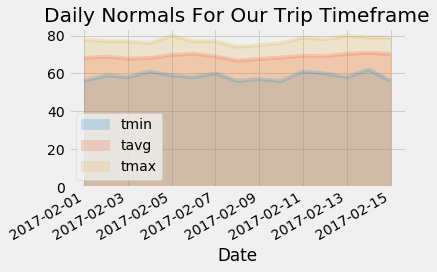

In [44]:
df_my_trip_range.plot(stacked = False, kind='area', alpha=.2, x_compat=True, title="Daily Normals For Our Trip Timeframe")
plt.tight_layout()
plt.show()